In [1]:
!pip3 install torch torchvision torchaudio

In [ ]:
# import os

# # Set the paths for CUDA
# os.environ["PATH"] ="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.6" + os.environ["CUDA_PATH"]
# os.environ["LD_LIBRARY_PATH"] ="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v12.6" + os.environ["CUDA_PATH"]

In [ ]:
# import os

# # Set CUDA paths (update the paths based on your installation)
# os.environ["PATH"] = "C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.6\\bin;" + os.environ["PATH"]
# os.environ["CUDA_PATH"] = "C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.6"
# os.environ["CUDA_HOME"] = "C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.6"

# !nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Oct_30_01:18:48_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.85
Build cuda_12.6.r12.6/compiler.35059454_0


In [2]:
# !pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ",TORCH_VERSION, "; CUDA: ",CUDA_VERSION)
print(torch.__version__)

torch:  2.4 ; CUDA:  cpu
2.4.1+cpu


In [3]:
!python -m pip install git+https://github.com/facebookresearch/detectron2.git

  Cloning https://github.com/facebookresearch/detectron2.git to c:\users\utkar\appdata\local\temp\pip-req-build-ju_ircpt
  Resolved https://github.com/facebookresearch/detectron2.git to commit c69939aa85460e8135f40bce908a6cddaa73065f
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git 'C:\Users\utkar\AppData\Local\Temp\pip-req-build-ju_ircpt'


In [4]:
import detectron2

from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np 
import os,json,cv2,random
# from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


In [ ]:
# !pip install roboflow

In [ ]:
#curl -L "https://universe.roboflow.com/ds/1htafqs1OP?key=3hyXXKgt6Q" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

#Download Dataset from roboflow
# # !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="uwcEFW4wjiuJayCklGmS")
# project = rf.workspace("new-workspace-yv6yw").project("ssd-vhs3t")
# version = project.version(1)
# dataset = version.download("coco")
                


In [5]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train",{},"D:/Projects/object_detection_using_detectron2/train/_annotations.coco.json","D:/Projects/object_detection_using_detectron2/train")
register_coco_instances("my_dataset_test",{},"D:/Projects/object_detection_using_detectron2/test/_annotations.coco.json","D:/Projects/object_detection_using_detectron2/test")

Display Data

In [6]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

WARNING [11/27 11:13:30 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



[11/27 11:13:30 d2.data.datasets.coco]: Loaded 675 images in COCO format from D:/Projects/object_detection_using_detectron2/train/_annotations.coco.json


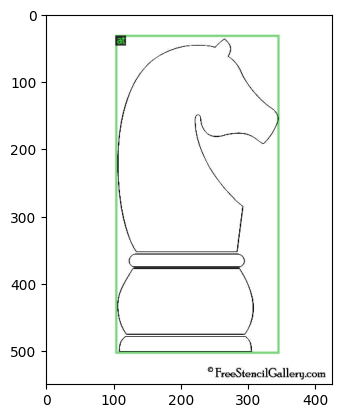

In [7]:
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    

In [8]:
# import torch
# print(torch.version.cuda) 

In [9]:
# !nvidia-smi

In [11]:
# import torch

# # Check if CUDA is available
# print(torch.cuda.is_available())  # Should return True

# # Check the GPU name
# if torch.cuda.is_available():
#     print("CUDA is available.")
#     print("GPU Name:", torch.cuda.get_device_name(0))  # Display the name of your GPU
# else:
#     print("CUDA is not available.")


In [14]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025  # pick a good LR
cfg.SOLVER.MAX_ITER = 50   # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
cfg.MODEL.DEVICE = 'cpu' #cuda present but not working so have changed device to cpu it will be slow.
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[11/27 11:24:52 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (7, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (7,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (24, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (24,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, 

[11/27 11:24:53 d2.engine.train_loop]: Starting training from iteration 0
[11/27 11:27:19 d2.utils.events]:  eta: 0:03:33  iter: 19  total_loss: 1.507  loss_cls: 0.8091  loss_box_reg: 0.5567  loss_rpn_cls: 0.004095  loss_rpn_loc: 0.01159    time: 7.0531  last_time: 9.3596  data_time: 0.1449  last_data_time: 0.0015   lr: 0.00095155  
[11/27 11:29:50 d2.utils.events]:  eta: 0:01:14  iter: 39  total_loss: 0.9289  loss_cls: 0.4104  loss_box_reg: 0.5383  loss_rpn_cls: 0.002288  loss_rpn_loc: 0.01487    time: 7.3279  last_time: 6.1075  data_time: 0.0025  last_data_time: 0.0018   lr: 0.0019506  
[11/27 11:31:02 d2.utils.events]:  eta: 0:00:00  iter: 49  total_loss: 1.112  loss_cls: 0.4488  loss_box_reg: 0.6741  loss_rpn_cls: 0.002288  loss_rpn_loc: 0.01696    time: 7.3011  last_time: 7.5564  data_time: 0.0023  last_data_time: 0.0014   lr: 0.0024501  
[11/27 11:31:02 d2.engine.hooks]: Overall training speed: 48 iterations in 0:05:50 (7.3011 s / it)
[11/27 11:31:02 d2.engine.hooks]: Total train

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir output

In [16]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("my_dataset_test", )
predictor = DefaultPredictor(cfg)

[11/27 11:33:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output\model_final.pth ...


d:\Anaconda\envs\realtime\lib\site-packages\fvcore\common\checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cp

In [17]:
test_metadata = MetadataCatalog.get("my_dataset_test")

KeyboardInterrupt: 

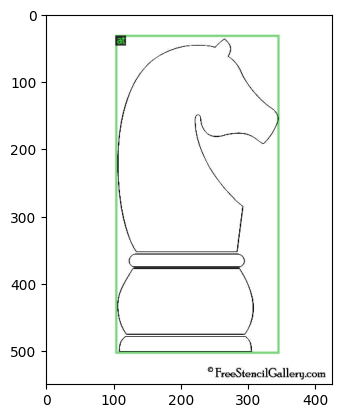

In [21]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('D:\\Projects\\object_detection_using_detectron2\\test\\*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata,
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  # cv2_imshow(out.get_image()[:, :, ::-1])
  plt.imshow(vis.get_image()[:, :, ::-1])

In [22]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_test", output_dir= "./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [11/27 11:36:16 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/27 11:36:16 d2.data.datasets.coco]: Loaded 170 images in COCO format from D:/Projects/object_detection_using_detectron2/test/_annotations.coco.json
[11/27 11:36:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/27 11:36:16 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/27 11:36:16 d2.data.common]: Serializing 170 elements to byte tensors and concatenating them all ...
[11/27 11:36:16 d2.data.common]: Serialized dataset takes 0.06 MiB
[11/27 11:36:16 d2.evaluation.evaluator]: Start inference on 170 batches
[11/27 11:36:36 d2.evaluation.evaluator]: Inference done 11/170. Dataloading: 0.0008 s/iter. Inference: 1.5262 s/iter. Eval: 0.0000 s/iter. Total: 1.5271 s/iter. ETA=0:

In [ ]:
#Save cfg file
f = open('config.yml','w')
f.write(cfg.dump())
f.close()